**Multitarefas - Mineração de Dados**


**Nome: Davi Augusto Neves Leite**

**Data de Entrega: 07/12/2023**


---


# **Materiais**


Os principais recursos para a execução desta atividade podem ser vistos a seguir.

1. **Software**

- Sistemas Operacionais: Windows 11 para _desktop_;
- Ambiente de Desenvolvimento Integrado: Microsoft Visual Studio Code;
- Linguagem de Programação: Python 3.12.0 64-bit.

2. **Hardware**

- Notebook pessoal Lenovo Ideapad 330-15IKB com: processador Intel Core i7-8550U, HDD WD Blue WD10SPZX de 1TB, SSD Crucial BX500 de 1TB, 12 GB DDR4 de Memória RAM e placa de vídeo NVIDIA GeForce MX150 (2 GB GDDR5 de memória).


---


# **Instalação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a instalação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install scikit-learn
%pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


---


# **Importação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a importação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [2]:
import numpy as np  # Manipulação de listas
import pandas as pd  # Manipulação de tabelas
import seaborn as sns  # Geração de gráficos estatísticos
import plotly.express as px  # Outro para geração de gráficos
import matplotlib.pyplot as plt  # Geração de gráficos de listas
import sklearn as skl  # Biblioteca para pré-processamento e outros
from copy import copy as cp  # Possibilitar copiar os objetos

# Importação do Scikit-Multilearn: biblioteca baseada no Scikit para tratar datasets multirrótulos
import skmultilearn as skml

# Ignorar os avisos não importantes durante a execução deste notebook
import warnings

warnings.filterwarnings("ignore")

---


# **Conjunto de Dados: _Multi-Label Classification Dataset_**


**Descrição do Dataset:** este conjunto de dados contém dados a respeito de artigos de pesquisa, com base no Título e Resumo, separados por meio de **6 rótulos diferentes**, sendo eles: _Computer Science_, _Physics_, _Mathematics_, _Statistics_, _Quantitative Biology_ e _Quantitative Finance_. Neste _dataset_, cada artigo (ou dado) pode ter **um ou mais rótulos assinalados**.

Este conjunto de dados pode ser acessado por meio de: [Multi-Label Classification Dataset](https://www.kaggle.com/datasets/shivanandmn/multilabel-classification-dataset)
(última data de acesso: 01 de dez. de 2023).


## **Importação da Base de Dados**


Para importar as imagens, utiliza-se o módulo **pandas** capaz de carregar diversas bases de dados através do arquivo **.csv**, o qual contém efetivamente os dados da base.


In [3]:
# Carrega os conjuntos de dados
data = pd.read_csv("./Datasets/Multi-Label Classification Dataset/train.csv")
data = data.drop(labels=["ID"], axis=1)  # Remoção do campo ID

# Remoção do TITLE e ABSTRACT -> somente as classes de interesse
labels_removed = ["TITLE", "ABSTRACT"]
data_class = data.drop(labels=labels_removed, axis=1)

# Descritores das classes de interesse
labels_names = [
    "Computer Science",
    "Physics",
    "Mathematics",
    "Statistics",
    "Quantitative Biology",
    "Quantitative Finance",
]

In [4]:
# Quantidade de dados e características
print("Conjunto de Dados")
print(f"Quantidade de Dados: {data.shape[0]}")
print(f"Quantidade de Características: {data.shape[1]}")

Conjunto de Dados
Quantidade de Dados: 20972
Quantidade de Características: 8


## **Pré-Processamento dos Dados**


### Exibição de Dados do Conjunto

Abaixo, é possível visualizar alguns dados do **dataset**.


In [5]:
# Exibindo os cinco primeiros e cinco últimos dados do dataset original
data

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
20967,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


A seguir, é possível visualizar a quantidade de dados por classe.


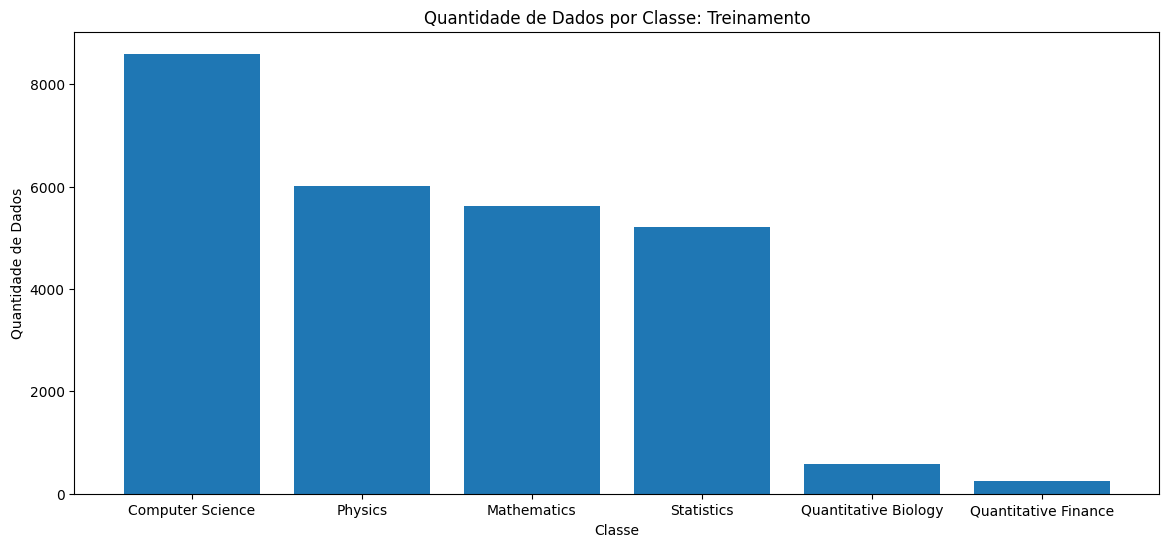

In [6]:
# Plotando a quantidade de dados por classe
class_counts = data_class.sum()
plt.figure(figsize=(14, 6))
plt.xlabel("Classe", loc="center")
plt.ylabel("Quantidade de Dados", loc="center")
plt.title("Quantidade de Dados por Classe: Treinamento", loc="center")
plt.bar(labels_names, class_counts)
plt.show()

### Tratamento de Dados Perdidos ou Inexistentes (NaN)


Para verificar se algum dado está faltando, **caso não seja indicado pela descrição do _dataset_**, pode ser realizado a seguinte operação de força-bruta:


In [7]:
# Verificando o número de dados faltantes no conjunto a partir do NumPy
data_np = data_class.to_numpy()
missing_image = np.isnan(data_np)
missing_image = np.sum(missing_image)
print("Número de Dados Perdidos: {0}".format(missing_image))

Número de Dados Perdidos: 0


Como é possível ver, não há nenhum dado perdido neste _dataset_ e, desta forma, não é necessário realizar nenhum método de tratamento neste contexto.


---


## **Tema: Classificação Multirrótulo**


Texto


### **Técnica 1:** **_Binary Relevance (BR)_**


Texto


### **Técnica 2:** **_Label Powerset (LP)_**


Texto


### **Técnica 3:** **_Ranking by Pairwise Comparision (RPC)_**


Texto


---
